# <b>IFI 8420 - Assignment 4</b>
### Team 5
Mina Carbajal, Carmen Morales-Mier, Gaayathri Rayapaneni, Ignatius Jonathan Sugijono

<hr>

#### Installing all the requirement packages

In [46]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz,plot_tree
from sklearn.metrics import mean_squared_error, r2_score

#### Downloading College CSV data

In [24]:
college = pd.read_csv('College.csv')
print(college.info())

X = college.drop('Apps', axis=1)
y = college['Apps']

X = pd.get_dummies(X, drop_first=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

<hr>

### <b>Section 1</b> - <u>LASSO</u>: Predict the number of applications received <b>Apps</b> using all other variables in the <b>College</b> data set using <b>LASSO</b> model for variable selection
##### <u>Section Code Split</u>
<ul>
    <li>Mina - E, F, G</li>
    <li>Carmen - A, B, C, D</li>
    <li>Gaayathri - </li>
    <li>Jonathan - </li>   
</ul>

<hr>

#### Splitting the data set randomly into training and test data sets. (<b>A</b>)

In [25]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

#### Fitting the LASSO model using the training data set. (<b>B</b>)

In [26]:
lasso2 = Lasso(alpha = 4)
lasso2.fit(X_train, y_train)
pred2 = lasso2.predict(X_test)
print(pd.Series(lasso2.coef_, index = X.columns))
print("MSE: ", mean_squared_error(y_test, pred2))

Accept                                          1.263616
Enroll                                         -0.003872
Top10perc                                      37.000546
Top25perc                                      -9.665180
F.Undergrad                                     0.031155
                                                ...     
Unnamed: 0_Xavier University                   -0.000000
Unnamed: 0_Xavier University of Louisiana       0.000000
Unnamed: 0_Yale University                   2365.312448
Unnamed: 0_York College of Pennsylvania         0.000000
Private_Yes                                  -203.235859
Length: 793, dtype: float64
MSE:  1187722.5602323648


#### Cross-validation on the training data set to choose the best lambda. (<b>C</b>)

In [27]:
alphas = 10**np.linspace(10,-2,100)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)
print(pd.Series(lassocv.coef_, index = X.columns))
print("The best lambda: ", lassocv.alpha_)

Accept                                         1.170931
Enroll                                         0.350071
Top10perc                                     54.162201
Top25perc                                    -17.785350
F.Undergrad                                    0.010110
                                                ...    
Unnamed: 0_Xavier University                  -0.000000
Unnamed: 0_Xavier University of Louisiana      0.000000
Unnamed: 0_Yale University                     0.000000
Unnamed: 0_York College of Pennsylvania        0.000000
Private_Yes                                 -243.977628
Length: 793, dtype: float64
The best lambda:  9.369087114301934


#### Estimating the predicted values using the best lambda obtained in part (C) on the test data, and computing the test MSE. (<b>D</b>)

In [28]:
y_pred = lassocv.predict(X_test)
pred3 = mean_squared_error(y_test, y_pred)
print("MSE using best lambda:", pred3)

MSE using best lambda: 1352370.2154947505


#### Conclusion: Comparing the LASSO predicted test MSE with the null model test MSE, and least square regression model test MSE, <i>written in Python</i>. (<b>E</b>)

In [29]:
# Null Model MSE
lasso_null = Lasso(alpha = 10**10)
lasso_null.fit(X_train, y_train)
y_pred = lasso_null.predict(X_test)
pred4 = mean_squared_error(y_test, y_pred)
print(pd.Series(lasso_null.coef_, index = X.columns))
print("MSE using the Null Model: ", pred4)

Accept                                       0.0
Enroll                                       0.0
Top10perc                                    0.0
Top25perc                                    0.0
F.Undergrad                                  0.0
                                            ... 
Unnamed: 0_Xavier University                -0.0
Unnamed: 0_Xavier University of Louisiana    0.0
Unnamed: 0_Yale University                   0.0
Unnamed: 0_York College of Pennsylvania     -0.0
Private_Yes                                 -0.0
Length: 793, dtype: float64
MSE using the Null Model:  17455722.410031803


In [30]:
# Least Square Regression MSE
lasso_lr = Lasso(alpha = 0)
lasso_lr.fit(X_train, y_train)
y_pred = lasso_lr.predict(X_test)
pred5 = mean_squared_error(y_test, y_pred)
print(pd.Series(lasso_lr.coef_, index = X.columns))
print("MSE using the LSE Model: ", pred5)

Accept                                          1.449127
Enroll                                          0.074620
Top10perc                                      41.843551
Top25perc                                      -5.749204
F.Undergrad                                    -0.029065
                                                ...     
Unnamed: 0_Xavier University                 -750.087485
Unnamed: 0_Xavier University of Louisiana       0.000000
Unnamed: 0_Yale University                   3397.905652
Unnamed: 0_York College of Pennsylvania       481.284468
Private_Yes                                    -3.289317
Length: 793, dtype: float64
MSE using the LSE Model:  1137205.6330091902


C:\Users\ignat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\ignat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


In [31]:
# Comparing all 3 MSEs
print("THE NULL MODEL")
print("This model MSE (",pred4,") is the highest of the 3, and therefore performs the worst. When lambda is infinity, the shrinkage penalty causes all the coefficient estimates to go to zero, instead of removing only irrelavent variables, as seen above. This model is underfitted and suffers from high bias.")
print("\n")
print("THE LSE MODEL")
print("This model actually produces the lowest MSE value of the 3 (",pred5,"), however it is not without downside. When lambda is zero, the shrinkage penalty has no effect at all, and irrelavent variables remain present in the model. This model is overfitted and suffers from high variance.")
print("\n")
print("THE BEST LAMBDA MODEL")
print("This model gives an MSE value in between the null and LSE models, (",pred3,"), but it successfully makes use of the shrinkage penalty to remove irrelavent variables. It properly demonstrates the bias-variance trade-off.")

THE NULL MODEL
This model MSE ( 17455722.410031803 ) is the highest of the 3, and therefore performs the worst. When lambda is infinity, the shrinkage penalty causes all the coefficient estimates to go to zero, instead of removing only irrelavent variables, as seen above. This model is underfitted and suffers from high bias.


THE LSE MODEL
This model actually produces the lowest MSE value of the 3 ( 1137205.6330091902 ), however it is not without downside. When lambda is zero, the shrinkage penalty has no effect at all, and irrelavent variables remain present in the model. This model is overfitted and suffers from high variance.


THE BEST LAMBDA MODEL
This model gives an MSE value in between the null and LSE models, ( 1352370.2154947505 ), but it successfully makes use of the shrinkage penalty to remove irrelavent variables. It properly demonstrates the bias-variance trade-off.


#### Constructing the LASSO model for the entire data set and obtaining the LASSO coefficients using the best lambda obtained in part (C) + reporting the number of non-zero coefficient estimates. (<b>F</b>)

In [32]:
# Fitting the model using the best lambda
lasso_final = Lasso(alpha=lassocv.alpha_)
lasso_final.fit(X, y)
coef = pd.Series(lasso_final.coef_, index=X.columns)
print(coef)

Accept                                         1.567544
Enroll                                        -0.844624
Top10perc                                     49.317764
Top25perc                                    -13.980303
F.Undergrad                                    0.062534
                                                ...    
Unnamed: 0_Xavier University                  -0.000000
Unnamed: 0_Xavier University of Louisiana     -0.000000
Unnamed: 0_Yale University                     0.000000
Unnamed: 0_York College of Pennsylvania        0.000000
Private_Yes                                 -373.511583
Length: 793, dtype: float64


In [33]:
#Getting non-zero coefficients
non_zero_coef = np.count_nonzero(coef)
print("Non-zero Coefficients:", non_zero_coef)

Non-zero Coefficients: 18


#### Using the LASSO predictors obtained in part (F) to fit the Linear Regression Model + report summary of the linear model. (<b>G</b>)

In [34]:
predictors = coef[coef != 0].index
X_pred = X[predictors]

lin_reg = LinearRegression()
lin_reg.fit(X_pred, y)
y_pred = lin_reg.predict(X_pred)

lin_reg_coefs = pd.Series(lin_reg.coef_, index=X_pred.columns)
print(lin_reg_coefs)

Accept                                     1.291866
Enroll                                    -0.317288
Top10perc                                 46.848026
Top25perc                                -13.512837
F.Undergrad                                0.074086
P.Undergrad                                0.029498
Outstate                                  -0.055362
Room.Board                                 0.181589
Books                                      0.006481
Personal                                  -0.000690
PhD                                       -7.655770
Terminal                                  -3.849972
S.F.Ratio                                 12.836059
perc.alumni                               -5.452760
Expend                                     0.077573
Grad.Rate                                  9.914822
Unnamed: 0_Rutgers at New Brunswick    12674.477977
Private_Yes                             -579.782938
dtype: float64


In [35]:
# Model Summary
print("MSE: ", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

MSE:  931189.0414176561
R-squared: 0.9377513404886181


<hr>

### <b>Section 2</b> - <u>Regression Tree</u>: Predict the number of applications received <b>Apps</b> using all other variables in the <b>College</b> data set based on a <b>Regression Tree</b>
##### <u>Section Code Split</u>
<ul>
    <li>Mina - A</li>
    <li>Carmen - </li>
    <li>Gaayathri - <B, C, D, E, F/li>
    <li>Jonathan - </li>   
</ul>

<hr>

#### Fitting a Regression Tree to the training data, with Apps as the response and the all other variables as predictors. (<b>A</b>)
<ul><li>Tree max depth = 3.</li>
    <li>Plot of the tree.</li>
    <li>Note of how many terminal nodes the tree has, <i>written in Python</i>.</li>
</ul>

In [36]:
# Fitting the tree
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0) 

regr_tree_college = DecisionTreeRegressor(max_depth = 3) 
regr_tree_college.fit(X_train, y_train)

type(y_train)
print(y)

0       1660
1       2186
2       1428
3        417
4        193
       ...  
772     2197
773     1959
774     2097
775    10705
776     2989
Name: Apps, Length: 777, dtype: int64


In [37]:
# Plot of the tree
export_graphviz(regr_tree_college,                 
                out_file = "college_tree.dot",                 
                feature_names = X_train.columns)

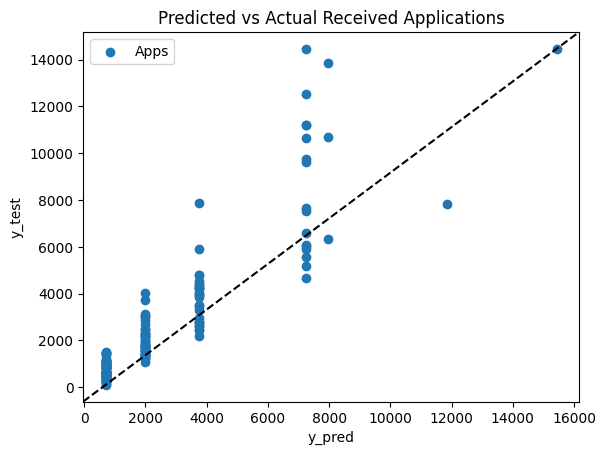

In [38]:
y_pred = regr_tree_college.predict(X_test) 
plt.scatter(y_pred,             
            y_test,             
            label = 'Apps') 
plt.plot([0, 1],          
         [0, 1],          
         '--k',          
         transform = plt.gca().transAxes) 
plt.xlabel('y_pred') 
plt.ylabel('y_test')
plt.legend()
plt.title('Predicted vs Actual Received Applications')
plt.show()

In [39]:
# Counting the terminal nodes
terminal_nodes = regr_tree_college.get_n_leaves()
print("Number of terminal nodes:", terminal_nodes)

Number of terminal nodes: 8


#### Training accuracy, Test Accuracy, and Test MSE. (<b>B</b>)

In [40]:
# Predictions
y_train_pred = regr_tree_college.predict(X_train)
y_test_pred = regr_tree_college.predict(X_test)

# Metrics
train_accuracy = regr_tree_college.score(X_train, y_train)
test_accuracy = regr_tree_college.score(X_test, y_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test MSE: {test_mse:.4f}")


Training Accuracy: 0.9229
Test Accuracy: 0.8010
Test MSE: 1799578.6490


#### Finding the optimal depth that will improve performance + using cost complexity pruning to prune the decision tree. (<b>C</b>)

In [41]:
# Decision Tree with optimal depth
depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

optimal_depth = depths[np.argmax(test_scores)]

# Train Decision Tree with optimal depth
optimal_dt = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
optimal_dt.fit(X_train, y_train)

# Cost Complexity Pruning
path = optimal_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Finding best alpha
pruned_models = [DecisionTreeRegressor(ccp_alpha=alpha, random_state=42).fit(X_train, y_train) for alpha in ccp_alphas]
pruned_scores = [model.score(X_test, y_test) for model in pruned_models]

optimal_alpha = ccp_alphas[np.argmax(pruned_scores)]

# Final pruned Decision Tree
final_dt = DecisionTreeRegressor(ccp_alpha=optimal_alpha, random_state=42)
final_dt.fit(X_train, y_train)

print(f"Optimal Depth: {optimal_depth}")
print(f"Optimal Alpha for Pruning: {optimal_alpha:.6f}")
print(f"Final Model Test Score: {final_dt.score(X_test, y_test):.4f}")


Optimal Depth: 4
Optimal Alpha for Pruning: 54747.790884
Final Model Test Score: 0.8942


#### Conclusion: Plot of (C) + observing total impurity versus effective alpha for training set, <i>written in Python</i>. (<b>D</b>)

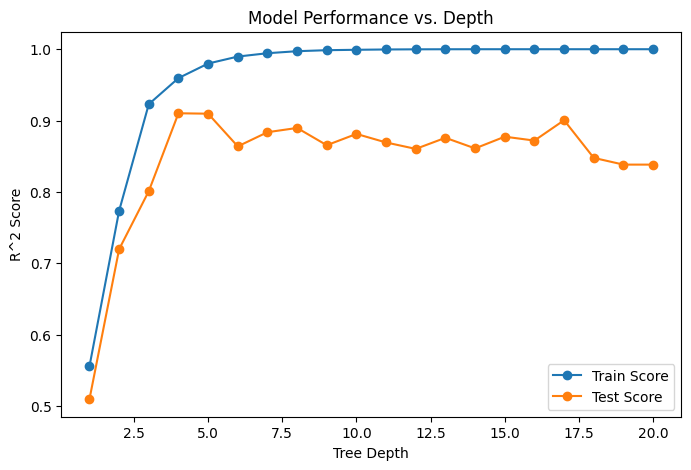

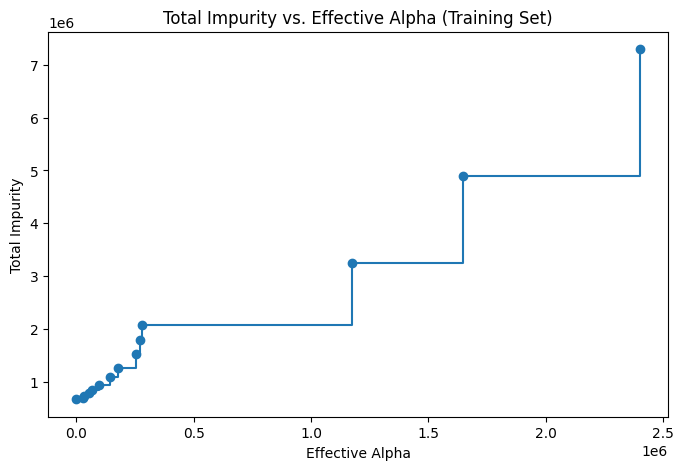

In [42]:
# Plot performance vs. depth
plt.figure(figsize=(8, 5))
plt.plot(depths, train_scores, label="Train Score", marker="o")
plt.plot(depths, test_scores, label="Test Score", marker="o")
plt.xlabel("Tree Depth")
plt.ylabel("R^2 Score")
plt.title("Model Performance vs. Depth")
plt.legend()
plt.show()

# Plot impurity vs. alpha
impurities = path.impurities

plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity")
plt.title("Total Impurity vs. Effective Alpha (Training Set)")
plt.show()


#### Conclusion: Constructing plots to display number of nodes versus alpha and tree depth versus alpha, <i>written in Python</i>. (<b>E</b>)

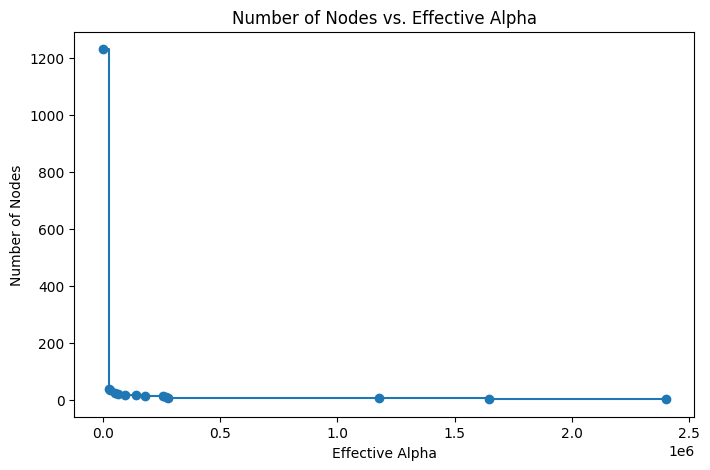

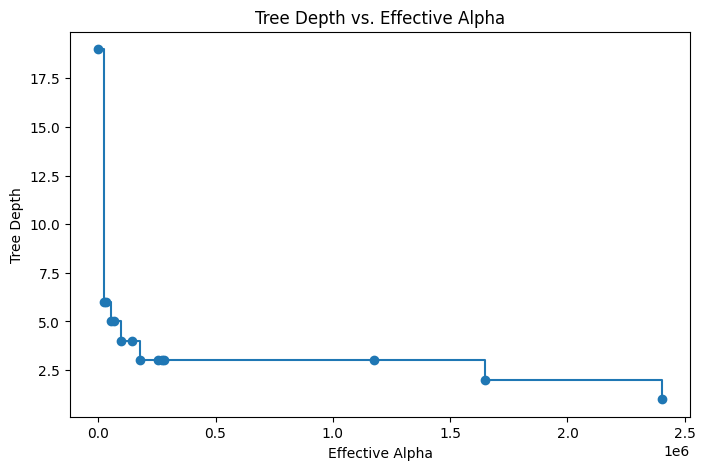

In [43]:
# Extract number of nodes and depth for different alphas
node_counts = [model.tree_.node_count for model in pruned_models]
depths = [model.tree_.max_depth for model in pruned_models]

# Plot number of nodes vs. alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas[:-1], node_counts[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Number of Nodes")
plt.title("Number of Nodes vs. Effective Alpha")
plt.show()

# Plot tree depth vs. alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas[:-1], depths[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Tree Depth")
plt.title("Tree Depth vs. Effective Alpha")
plt.show()


#### Conclusion: Constructing a plot to observe changes of training and test accuracy with respect to alpha, <i>written in Python</i>. (<b>F</b>)

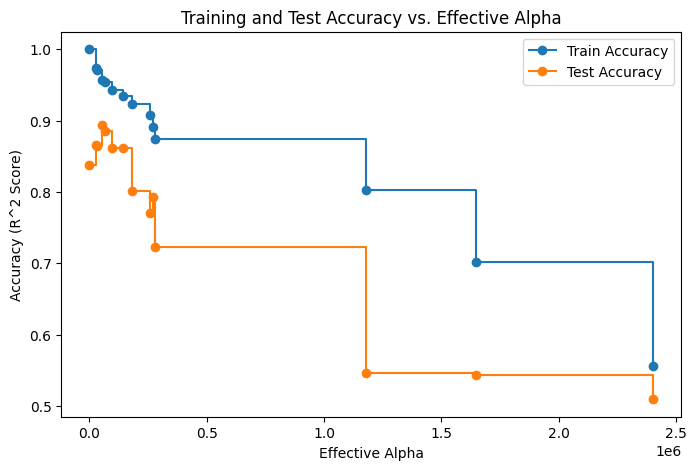

Train Accuracy:
The model perfroms best at lower effective alpha values, with accuracy declining as alpha increases, which indicates potential overfitting at low alpha values or decreasing complexity at higher values


Test Accuracy
The test accuracy follows a similar downward trend but is more volatile which implies that the model struggles to generalize well across higher alpha values


In [44]:
# Compute training and test scores for different alphas
train_scores_alpha = [model.score(X_train, y_train) for model in pruned_models]
test_scores_alpha = [model.score(X_test, y_test) for model in pruned_models]

# Plot training and test accuracy vs. alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas[:-1], train_scores_alpha[:-1], label="Train Accuracy", marker="o", drawstyle="steps-post")
plt.plot(ccp_alphas[:-1], test_scores_alpha[:-1], label="Test Accuracy", marker="o", drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Accuracy (R^2 Score)")
plt.title("Training and Test Accuracy vs. Effective Alpha")
plt.legend()
plt.show()

print("Train Accuracy:")
print("The model perfroms best at lower effective alpha values, with accuracy declining as alpha increases, which indicates potential overfitting at low alpha values or decreasing complexity at higher values")
print("\n")
print("Test Accuracy")
print("The test accuracy follows a similar downward trend but is more volatile which implies that the model struggles to generalize well across higher alpha values")

#### Conclusion: Creating the final Tree, <i>written in Python</i>. (<b>G</b>)
<ul>
    <li>Finding which alpha corresponds to the highest test score.</li>
    <li>Finding the depth of the tree corresponding to the best alpha and create the tree using that depth.</li>
    <li>Printing the decision tree.</li>
    <li>Computing the mean squared test error corresponding to the tree with best alpha.</li>
</ul>

The best alpha corresponding to the highest test score is: 54747.790883754744
Mean Squared Test Error: 855681.710975159


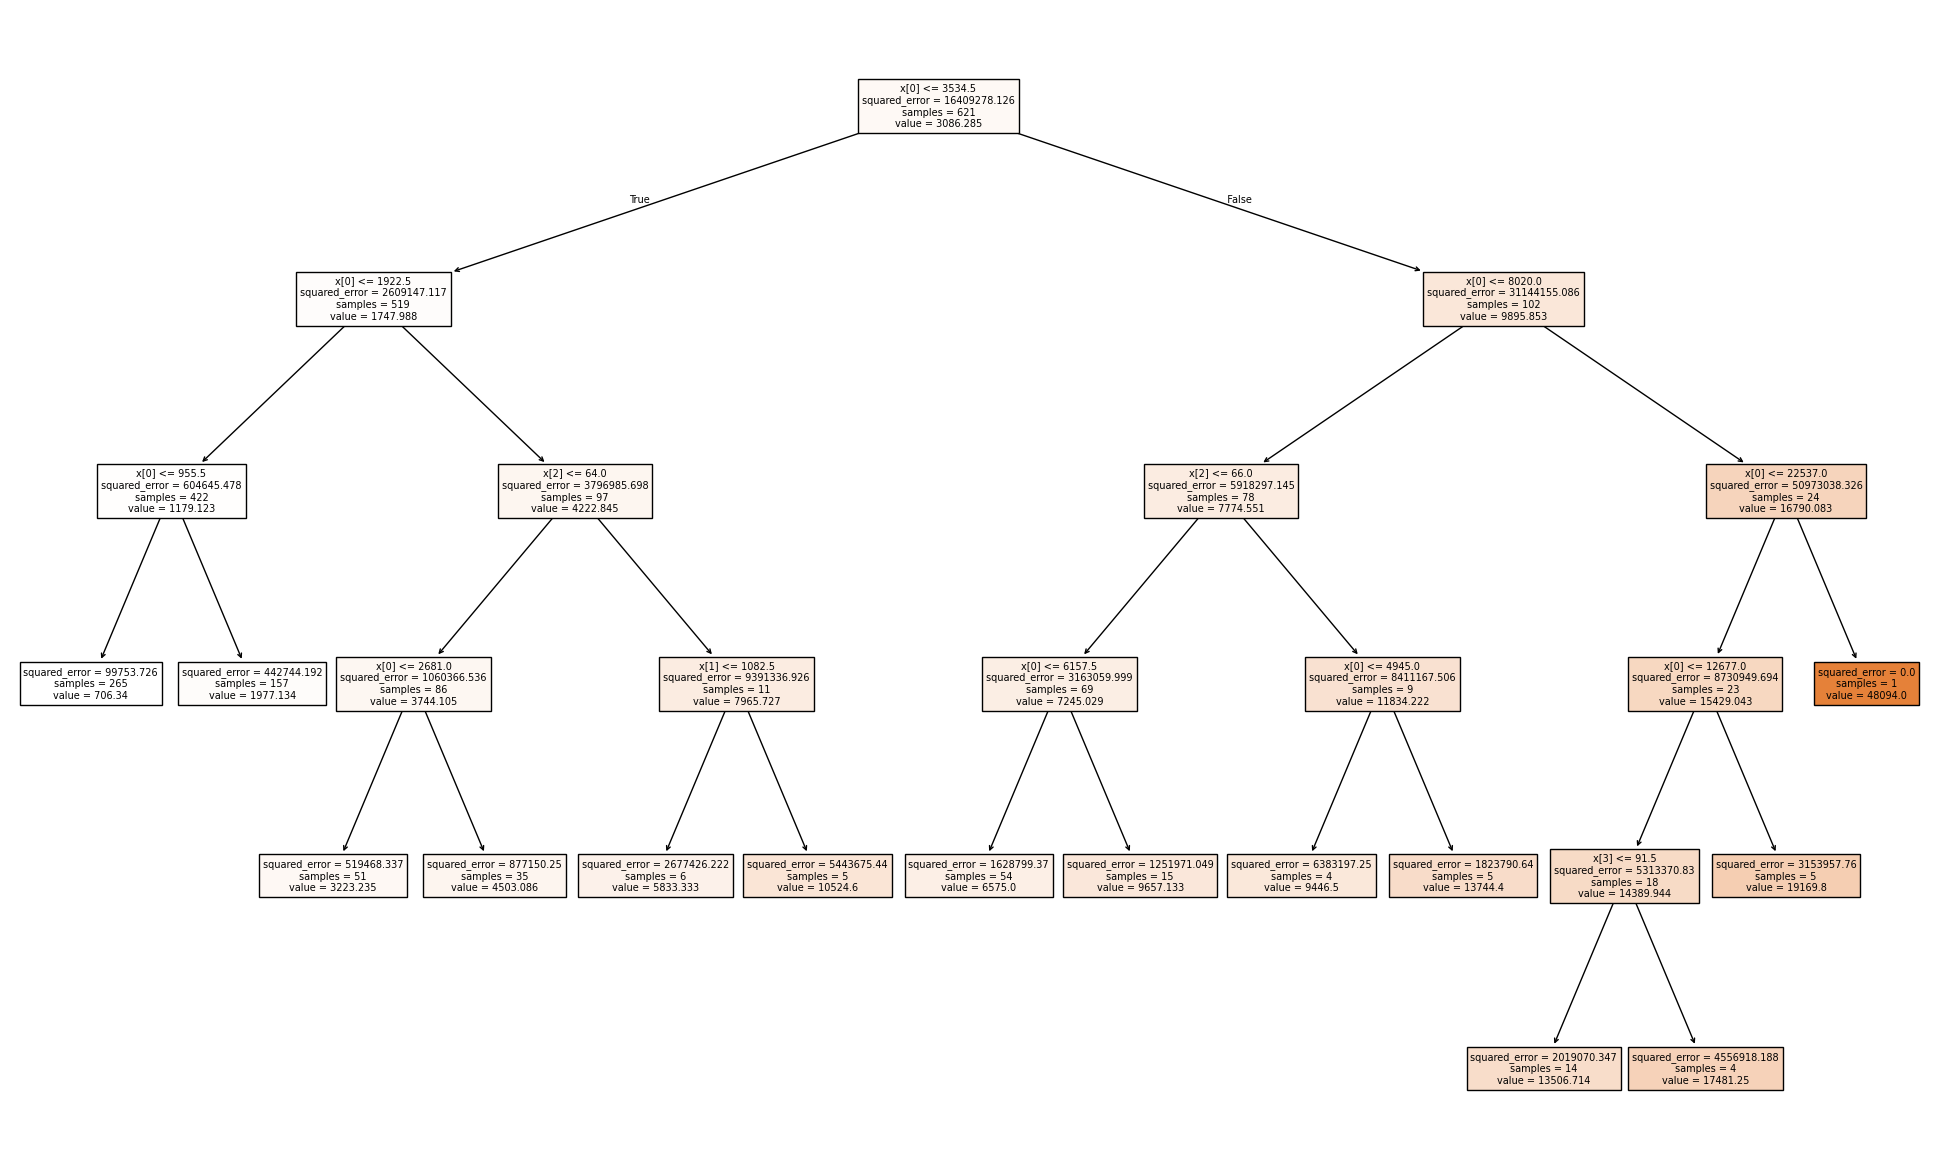

In [47]:
alphas = ccp_alphas[:-1]
test_scores = test_scores_alpha[:-1]
depths = depths[:-1]

max_index = np.argmax(test_scores)
best_alpha = alphas[max_index]
optimal_depth = depths[max_index]

print(f"The best alpha corresponding to the highest test score is: {best_alpha}")

updated_tree = DecisionTreeRegressor(max_depth=optimal_depth, ccp_alpha=best_alpha)
updated_tree.fit(X_train, y_train)
y_pred_updated = updated_tree.predict(X_test)
mse_best_alpha = mean_squared_error(y_test, y_pred_updated)

print(f"Mean Squared Test Error: {mse_best_alpha}")

plt.figure(figsize=(25, 15))
plot_tree(updated_tree, filled=True)
plt.show()

#### Conclusion: Comparing the above test error rates in (G) with the one obtained using LASSO regression (test MSE) in Part 1(D), <i>written in Python</i>. (<b>H</b>)

In [ ]:
print("Result from 1D")
print("MSE using best lambda:", pred3)
print("\n")
print("Result from above test")
print(f"MSE using best alpha and optimal depth {mse_best_alpha}")
print("\n")

improvement = ((mse_best_lambda - mse_best_alpha) / mse_best_lambda) * 100

print("The model using the best alpha and optimal depth demonstrates a significantly better performance compared to the model using the best lambda.")
print(f"Specifically, the Mean Squared Error (MSE) for the model with the best alpha and optimal depth is {mse_best_alpha}, which represents an improvement around {improvement:.2f}% over the MSE of the model with the best lambda {pred3}")
print("This improvement concludes that searching for the best alpha and optimal depth leads to a more accurate model comparing to just lambda")
print("It shows that optimizing the depth of tree plays a crucial role in reducing error and improving model's performance")
print("So, it is recommended to utilize both alpha and tree depth during tuning when using Decision Tree models")